In [ ]:
# Importing Necessary Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
from prophet import Prophet

In [ ]:
# load the data
df  = pd.read_csv('covid_19_clean_complete.csv')

In [ ]:
# checking 5 five rows & shape
print(df.shape)
df.head()

(49068, 10)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


##Data Columns Overview:
* Province/State: Contains data for specific regions in some countries, but many values are missing (only 14,664 non-null).
* Country/Region: The country or region name (49,068 non-null).
* Lat and Long: Latitude and Longitude coordinates for the location (complete, non-null).
* Date: The date when the data was recorded (complete, but stored as an object, likely needs conversion to datetime).
* Confirmed: The total number of confirmed COVID-19 cases (49,068 non-null).
* Deaths: The total number of deaths due to COVID-19 (49,068 non-null).
* Recovered: The total number of recoveries (49,068 non-null).
* Active: Active cases (calculated as confirmed - deaths - recovered).
* WHO Region: The WHO classification for regions (49,068 non-null).

In [ ]:
# covert date column to datetime
df['Date']  =pd.to_datetime(df['Date'])

In [ ]:
# Handling missing Province/State
df['Province/State'].fillna('Unknown', inplace=True)

<ipython-input-66-701b6dab6e48>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# cheking null values
df.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Lat,49068.0,21.43373,-51.7963,7.873054,23.6345,41.20438,71.7069,24.95032
Long,49068.0,23.528236,-135.0,-15.3101,21.7453,80.771797,178.065,70.44274
Date,49068,2020-04-24 12:00:00,2020-01-22 00:00:00,2020-03-08 18:00:00,2020-04-24 12:00:00,2020-06-10 06:00:00,2020-07-27 00:00:00,NaN
Confirmed,49068.0,16884.904255,0.0,4.0,168.0,1518.25,4290259.0,127300.205272
Deaths,49068.0,884.17916,0.0,0.0,2.0,30.0,148011.0,6313.584411
Recovered,49068.0,7915.713479,0.0,0.0,29.0,666.0,1846641.0,54800.918731
Active,49068.0,8085.011617,-14.0,0.0,26.0,606.0,2816444.0,76258.903026


In [ ]:
# Covid Cases
cases = ['Confirmed','Deaths','Recovered','Active']

# Active cases
df['Active'] = df['Confirmed']- df['Deaths']- df['Recovered']

In [ ]:
# calculating the total sum of 'Confirmed', 'Deaths', 'Recovered', and 'Active' cases grouped by 'Date'.
temp = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-07-27 00:00:00,16480485,654036,9468087,6358362


In [ ]:
# Total Confirmed , Death, Recovered, Actives Cases by Country/region
full_latest = df[df['Date'] == max(df['Date'])].reset_index()
full_latest_grouped = full_latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
lastest_df = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
lastest_df = lastest_df.reset_index(drop=True)
lastest_df.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,4290259,148011,1325804,2816444
1,Brazil,2442375,87618,1846641,508116
2,India,1480073,33408,951166,495499
3,Russia,816680,13334,602249,201097
4,South Africa,452529,7067,274925,170537
5,Mexico,395489,44022,303810,47657
6,Peru,389717,18418,272547,98752
7,Chile,347923,9187,319954,18782
8,United Kingdom,301708,45844,1437,254427
9,Iran,293606,15912,255144,22550


In [ ]:
# Top 10 Countries That has most Active Cases
lastest_df[0:10]['Country/Region']

,Country/Region
0,US
1,Brazil
2,India
3,Russia
4,South Africa
5,Mexico
6,Peru
7,Chile
8,United Kingdom
9,Iran


In [ ]:
# Global time series by summing up data for all countries
df_global = df.groupby('Date').sum().reset_index()

# Plot cases globally over time
import plotly.express as px

fig = px.line(df_global, x='Date', y='Confirmed', title='Global Confirmed COVID-19 Cases Over Time')
fig.show()

fig = px.line(df_global, x='Date', y='Active', title='Global Active COVID-19 Cases Over Time')
fig.show()

fig = px.line(df_global, x='Date', y='Deaths', title='Global Death COVID-19 Cases Over Time')
fig.show()

fig = px.line(df_global, x='Date', y='Recovered', title='Global Recovered COVID-19 Cases Over Time')
fig.show()

In [ ]:
# Prepare data for Prophet (confirmed cases)
confirmed = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Initialize the Prophet model
model = Prophet()
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/lplbp4vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/33rvta2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82037', 'data', 'file=/tmp/tmpamd3mc8a/lplbp4vj.json', 'init=/tmp/tmpamd3mc8a/33rvta2h.json', 'output', 'file=/tmp/tmpamd3mc8a/prophet_modelsr9jy3w6/prophet_model-20241002193445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
confirmed.tail()

,ds,y
49063,2020-07-27,865
49064,2020-07-27,1691
49065,2020-07-27,354
49066,2020-07-27,7235
49067,2020-07-27,505


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



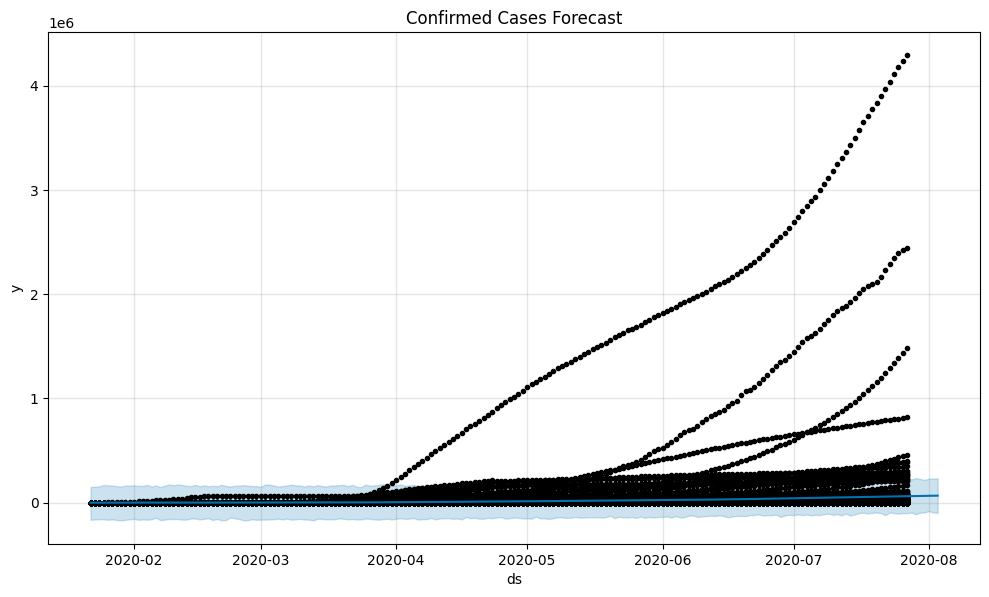

In [ ]:
# Predict future cases for the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualize forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Confirmed Cases Forecast')
fig.show()

In [ ]:
# 7 Day Forcast
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
185,2020-07-25,23395.108205,-73839.982313,120935.279182,23395.108205,23395.108205,12.493152,12.493152,12.493152,12.493152,12.493152,12.493152,0.0,0.0,0.0,23407.601357
186,2020-07-26,23616.966412,-80099.875204,119629.563201,23616.966412,23616.966412,30.487517,30.487517,30.487517,30.487517,30.487517,30.487517,0.0,0.0,0.0,23647.453929
187,2020-07-27,23838.824619,-75372.012411,119757.068099,23838.824619,23838.824619,-2.008881,-2.008881,-2.008881,-2.008881,-2.008881,-2.008881,0.0,0.0,0.0,23836.815738
188,2020-07-28,24060.682826,-77647.441882,122410.054983,24060.682826,24060.682826,-34.571452,-34.571452,-34.571452,-34.571452,-34.571452,-34.571452,0.0,0.0,0.0,24026.111374
189,2020-07-29,24282.541033,-70097.598041,122614.467513,24278.677129,24285.814528,-14.763089,-14.763089,-14.763089,-14.763089,-14.763089,-14.763089,0.0,0.0,0.0,24267.777944
190,2020-07-30,24504.399240,-75521.744179,123366.253531,24490.916272,24516.761129,-5.159641,-5.159641,-5.159641,-5.159641,-5.159641,-5.159641,0.0,0.0,0.0,24499.239599
191,2020-07-31,24726.257447,-68523.379255,123286.661360,24702.371308,24753.198516,13.522395,13.522395,13.522395,13.522395,13.522395,13.522395,0.0,0.0,0.0,24739.779842
192,2020-08-01,24948.115654,-78724.636023,118447.298744,24908.109804,24993.333104,12.493152,12.493152,12.493152,12.493152,12.493152,12.493152,0.0,0.0,0.0,24960.608806
193,2020-08-02,25169.973861,-74538.727760,121835.562057,25118.366009,25234.140966,30.487517,30.487517,30.487517,30.487517,30.487517,30.487517,0.0,0.0,0.0,25200.461378
194,2020-08-03,25391.832068,-66511.018802,116475.007179,25316.381043,25472.333145,-2.008881,-2.008881,-2.008881,-2.008881,-2.008881,-2.008881,0.0,0.0,0.0,25389.823187


In [ ]:
# Prepare data for Prophet (Death cases)
death = df[['Date', 'Deaths']].rename(columns={'Date': 'ds', 'Deaths': 'y'})

# Initialize the Prophet model
model = Prophet()
model.fit(death)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/mkqdx12x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/pkn5k3qs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89672', 'data', 'file=/tmp/tmpamd3mc8a/mkqdx12x.json', 'init=/tmp/tmpamd3mc8a/pkn5k3qs.json', 'output', 'file=/tmp/tmpamd3mc8a/prophet_model7nqi5lag/prophet_model-20241002193450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



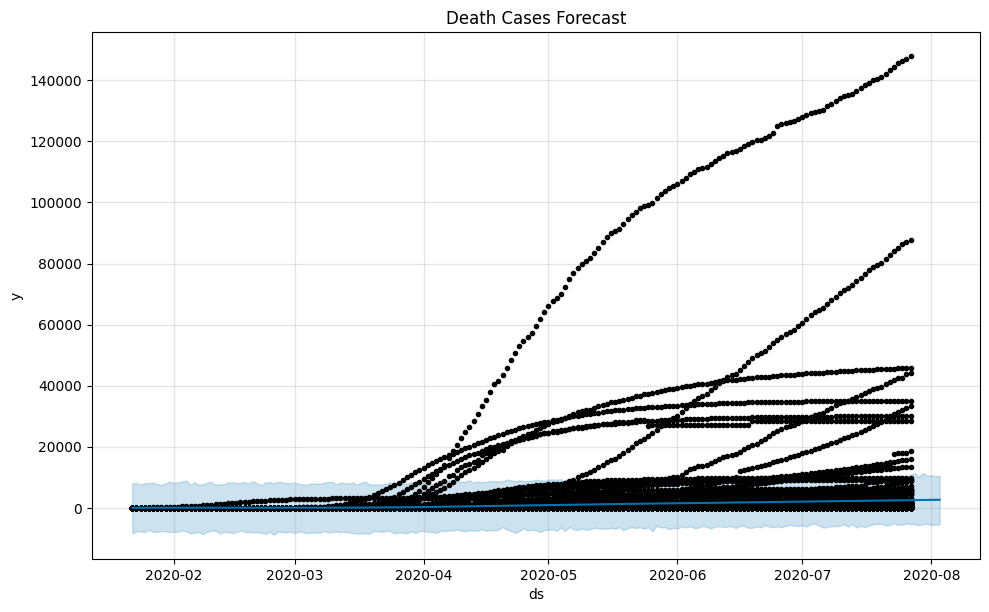

In [ ]:
# Predict future cases for the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualize forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Death Cases Forecast')
fig.show()

In [ ]:
# Prepare data for Prophet (Recovered cases)
recovered = df[['Date', 'Recovered']].rename(columns={'Date': 'ds', 'Recovered': 'y'})

# Initialize the Prophet model
model = Prophet()
model.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/53smfr06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/qrkhf9bd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37435', 'data', 'file=/tmp/tmpamd3mc8a/53smfr06.json', 'init=/tmp/tmpamd3mc8a/qrkhf9bd.json', 'output', 'file=/tmp/tmpamd3mc8a/prophet_modelluu2e18q/prophet_model-20241002193454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



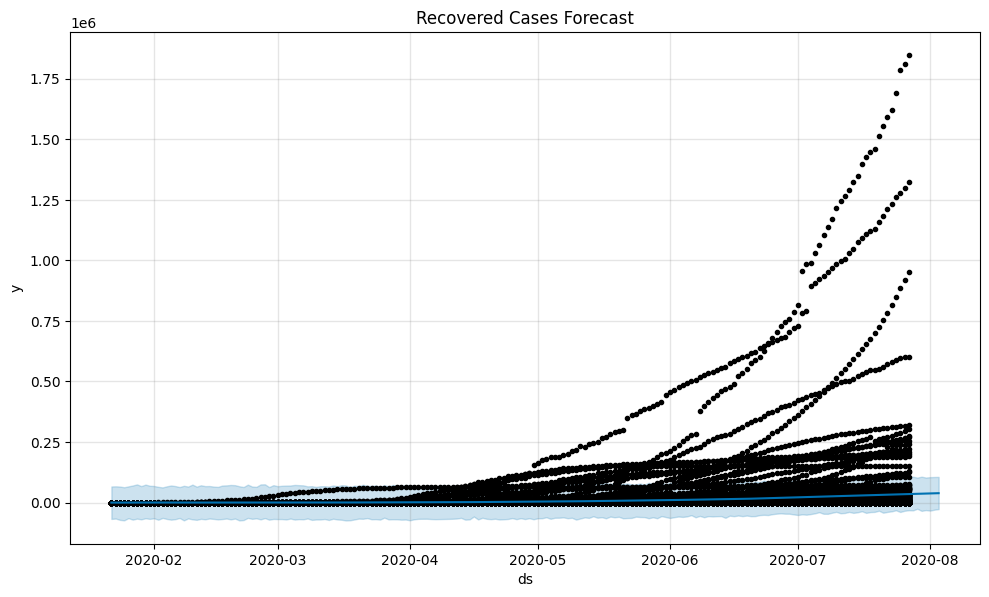

In [ ]:
# Predict future cases for the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualize forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Recovered Cases Forecast')
fig.show()

In [ ]:
# Prepare data for Prophet (Active cases)
active= df[['Date', 'Active']].rename(columns={'Date': 'ds', 'Active': 'y'})

# Initialize the Prophet model
model = Prophet()
model.fit(active)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/fqshe9bv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamd3mc8a/tv614qok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81052', 'data', 'file=/tmp/tmpamd3mc8a/fqshe9bv.json', 'init=/tmp/tmpamd3mc8a/tv614qok.json', 'output', 'file=/tmp/tmpamd3mc8a/prophet_modelkayl2ibs/prophet_model-20241002193459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:34:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



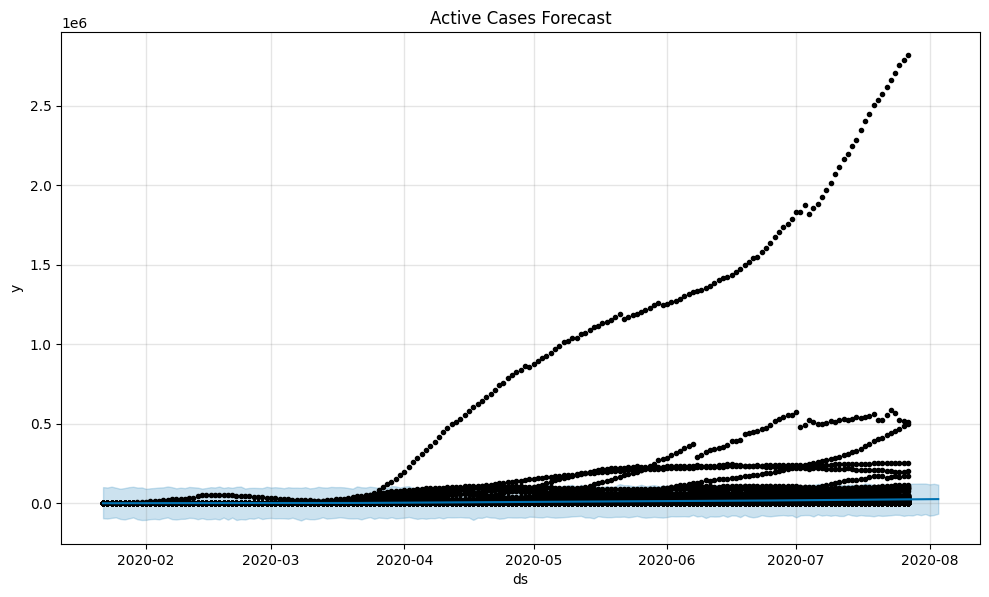

In [ ]:
# Predict future cases for the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualize forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Active Cases Forecast')
fig.show()